<h1 style="color: #FECB05; text-align: center;"> Introducción a las convoluciones </h1>

<h2 style="color: #007ACC;">Autores</h2>

- [Juan Felipe Contreras Alcívar](https://www.linkedin.com/in/juanf-contreras/)

---

<h2 style="color: #007ACC;">Tabla de contenido</h2>

- [<span style="color: #005C99;">Introducción</span>](#introduction)
- [<span style="color: #005C99;">Convoluciones en una dimensión</span>](#dim-curse)
- [<span style="color: #005C99;">Convoluciones en dos dimensiones</span>](#dim-curse)
- [<span style="color: #005C99;">Procesamiento de imágenes</span>](#dim-curse)
- [<span style="color: #005C99;">Padding</span>](#dim-curse)
- [<span style="color: #005C99;">Stride</span>](#dim-curse)
- [<span style="color: #005C99;">Pooling</span>](#dim-curse)
- [<span style="color: #005C99;">Referencias</span>](#reference)

---

<h2 style="color: #007ACC;"> Introducción </h2>

La **convolución** es una operación matemática fundamental en diversas disciplinas, incluyendo el procesamiento de señales, imágenes y el aprendizaje profundo. Esencialmente, una convolución combina dos funciones para producir una tercera, reflejando cómo una función modifica o "filtra" a otra. 

En el contexto de procesamiento de imágenes y redes neuronales convolucionales (CNN), la convolución se utiliza para aplicar un filtro (o kernel) a una imagen, generando una nueva representación que resalta características específicas, como bordes, texturas o patrones. Este proceso consiste en deslizar el filtro sobre la imagen, multiplicando y sumando sus valores con los de la región correspondiente de la imagen. El resultado es un mapa de características que captura información relevante para tareas como clasificación, segmentación y detección de objetos.

La convolución es valorada por su capacidad de reducir dimensiones de los datos y preservar información crítica, permitiendo que los algoritmos trabajen con representaciones más compactas y eficaces, mejorando la eficiencia y precisión en el análisis.

<h2 style="color: #007ACC;"> Convoluciones en una dimensión </h2>

**Versión continua en una dimensión:**

La convolución de dos funciones $f(t)$ y $g(t)$ se define como:

$$(f * g)(t) = \int_{-\infty}^{\infty} f(\tau) \cdot g(t - \tau) \, d\tau$$

Donde:
- $f(t)$ es la señal de entrada.
- $g(t)$ es el filtro o kernel.
- $\tau$ es una variable de integración que desliza el kernel sobre la señal.

**Versión discreta en una dimensión:**

En el caso de datos discretos (común en procesamiento de señales e imágenes digitales), la convolución se calcula como:

$$(f * g)[n] = \sum_{k=-\infty}^{\infty} f[k] \cdot g[n - k]$$

Donde:
- $f[k]$ es la señal discreta.
- $g[k]$ es el filtro o kernel discreto.
- $n$ es el índice del resultado de la convolución.

<h3 style="color: #007ACC;"> Ejemplo 1</h3>

Supongamos los siguientes dos vectores: $f = [6, 8, 5, 3]$ y $g = [3,6,4]$, definimos la convolución, $f * g$, como:

```
      [3,6,4]
[3,5,8,6]     = 3*6 = 18

    [3,6,4]
[3,5,8,6]     = 3*8 + 6*6 = 60

  [3,6,4]
[3,5,8,6]     = 3*5 + 6*8 + 4*6 = 87

[3,6,4]
[3,5,8,6]     = 3*3 + 6*5 + 4*8 = 71

[3,6,4]
  [3,5,8,6]   = 6*3 + 4*5 = 38

[3,6,4]
    [3,5,8,6]  = 4*3 = 12
```

Resultado: $[3,5,8,6] * [3,6,4] = [18, 60, 87, 71, 38, 12]$

Otra forma de resolver el problema es armando una matriz como la siguiente:

|      | \(3\)      | \(6\)      | \(4\)    |
|------|------------|-------------|-------------|
| \(6\)| 18     | 36      | 24   |
| \(8\)| 24     | 48      | 32   |
| \(5\)| 15     | 30      | 20   |
| \(3\) | 9    | 18      | 12   |


Ahora arreglamos la información en un vector, tal que cada entrada corresponde a la suma de cada diagonal secundaria:

$$[18, 24 + 36, 15 + 18 + 24, 18 + 30 + 32, 18 + 20, 12]$$

In [1]:
import numpy as np

In [8]:
g = [6, 8, 5, 3]
f = [3, 6, 4]

In [9]:
np.convolve(f, g)

array([18, 60, 87, 71, 38, 12])

<h3 style="color: #007ACC;"> Ejemplo 2</h3>

Supongamos que tenemos dos dados regulares y queremos calcular las probabilidaded de observar una suma dada. Sean $n_{1}$ e $n_{2}$ el resultado de arrojar dos dados, respectivamente, queremos calcular:

$$P(n_{1} + n_{2} = x)$$

Como cada dado tiene 6 caras, tenemos 36 diferentes posibles resultados, y, si el dado es regular, la probabilidad de obtener cada cara de cada dado es $1/6$. Así, para cada dado tendremos la siguiente distribución de probabilidad: $[1/6, 1/6, 1/6, 1/6, 1/6, 1/6]$; por lo que podemos construir la siguiente matriz_

|      | \(1\)      | \(2\)       | \(3\) | \(4\) | \(6\) | \(6\) |
|------|------------|-------------|-------------  | -------------| -------------| -------------|
| \(1\)| 1/36        | 1/36         | 1/36   | 1/36   | 1/36          |1/36           |
| \(2\)| 1/36        | 1/36         | 1/36   | 1/36   |1/36           |1/36           |
| \(3\)| 1/36        | 1/36         | 1/36   | 1/36   |1/36           |1/36           |
| \(4\)| 1/36        | 1/36         | 1/36   | 1/36   |1/36           |1/36           |
| \(5\)| 1/36        | 1/36         | 1/36   | 1/36   |1/36           |1/36           |
| \(6\)| 1/36        | 1/36         | 1/36   | 1/36   |1/36           |1/36           |

Note que cada diagonal secundaria corresponde al conjunto de valores de ambos dados que dan la misma suma, por lo que podemos calcular la probabilidad de obtener una suma dada calculando las suma de probabilidades de cada diagonal. El resultado es:

$$C = \left[\frac{1}{36}, \frac{2}{36}, \frac{3}{36}, \frac{4}{36}, \frac{5}{36}, \frac{6}{36}, \frac{5}{36}, \frac{4}{36}, \frac{3}{36}, \frac{2}{36}, \frac{1}{36} \right]$$

en dónde la entrada $i$ corresponde a $P(n_{1} + n_{2} = i)$. Note que $C \cdot \mathbf{\iota} = 1$, donde $\iota = [1, 1, 1, 1 , 1, 1]$.

<h3 style="color: #007ACC;"> Ejemplo 3: Medias móviles </h3>

Una **media móvil** es un indicador estadístico utilizado para analizar tendencias en una serie temporal de datos, suavizando las fluctuaciones a corto plazo para resaltar patrones a largo plazo. Se calcula como el promedio de un conjunto de valores en un período específico, que se desplaza conforme se añaden nuevos datos. Por ejemplo, en una serie de precios diarios, una media móvil de 7 días promediaría los valores de los últimos 7 días y se actualizaría diariamente, eliminando el valor más antiguo e incorporando el más reciente. Es ampliamente utilizada en finanzas, economía y análisis de datos para identificar tendencias, mitigar el ruido de datos y tomar decisiones informadas.

Esto puede ser interpretado como una convolución si definimos un vector de probabilidades y calculamos la convolución de la serie temporal con dicho vector. Por ejemplo, si definimos un vector de tamaño 21 en el que cada entrada es el número $1/21$, entonces cada operación que realicemos entre ambos vectores será el promedio de los 21 valores consevutivos de cada ventana. Si hacemos eso para toda la serie, tendremos una media móvil de 21.

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [20]:
# Configuración de la simulación
np.random.seed(42)  # Para reproducibilidad
n_points = 365  # Un año de datos diarios
trend = np.linspace(50, 150, n_points)  # Tendencia lineal ascendente
seasonality = 10 * np.sin(np.linspace(0, 2 * np.pi, n_points))  # Estacionalidad anual
noise = np.random.normal(0, 10, n_points)  # Ruido aleatorio

# Crear la serie de tiempo
time_series = trend + seasonality + noise

In [21]:
# Crear un DataFrame para almacenar los datos
dates = pd.date_range(start="2023-01-01", periods=n_points, freq="D")
time_series_df = pd.DataFrame({"Date": dates, "Value": time_series})

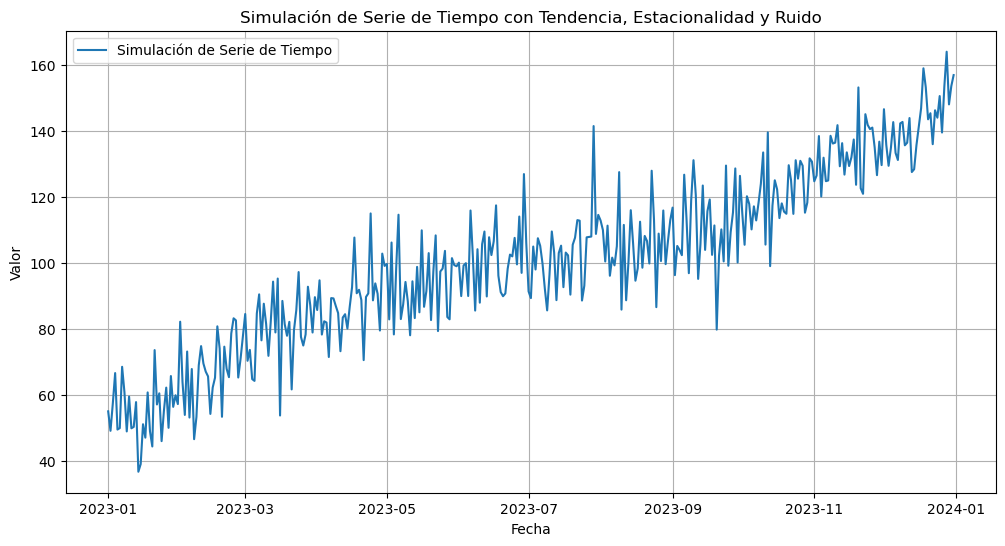

In [22]:
# Graficar la serie de tiempo
plt.figure(figsize=(12, 6))
plt.plot(time_series_df["Date"], time_series_df["Value"], label="Simulación de Serie de Tiempo")
plt.title("Simulación de Serie de Tiempo con Tendencia, Estacionalidad y Ruido")
plt.xlabel("Fecha")
plt.ylabel("Valor")
plt.legend()
plt.grid(True)
plt.show()

In [24]:
w = 21 * [1/21]

In [33]:
ma = np.convolve(time_series, w)

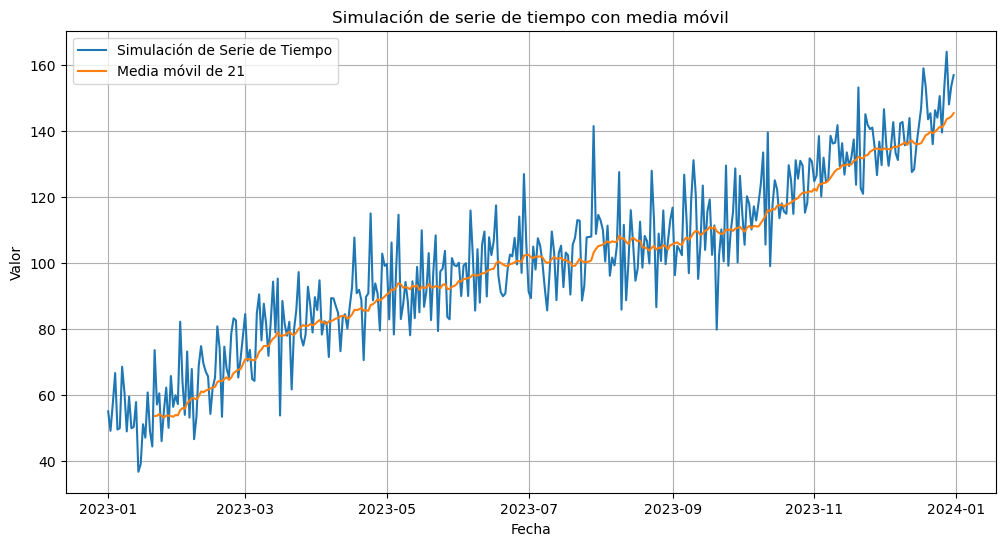

In [43]:
# Graficar la serie de tiempo
plt.figure(figsize=(12, 6))
plt.plot(time_series_df["Date"], time_series_df["Value"], label="Simulación de Serie de Tiempo")
plt.plot(time_series_df["Date"][20:], ma[20:-20], label = 'Media móvil de 21')
plt.title("Simulación de serie de tiempo con media móvil")
plt.xlabel("Fecha")
plt.ylabel("Valor")
plt.legend()
plt.grid(True)
plt.show()

<h2 style="color: #007ACC;"> Convoluciones en dos dimensiones </h2>

La **convolución en dos dimensiones** es una operación matemática utilizada principalmente en el procesamiento de imágenes y visión por computadora para analizar y extraer características locales de una imagen. Se define como el proceso de aplicar un filtro (o kernel) sobre una matriz bidimensional (la imagen) para generar una nueva matriz, conocida como mapa de características.

**Definición matemática discreta**
Para una matriz de entrada $f(x, y)$ y un filtro $g(a, b)$, la convolución en dos dimensiones se define como:

$$(f * g)(x, y) = \sum_{a} \sum_{b} f(x - a, y - b) \cdot g(a, b)$$

Donde:
- $f(x, y)$: Representa la matriz de entrada (por ejemplo, una imagen).
- $g(a, b)$: Es el filtro o kernel (una matriz más pequeña que actúa como transformador).
- $x, y$: Coordenadas de la posición en el mapa de características resultante.
- $a, b$: Coordenadas del filtro

**Definición matemática continua**
Dadas dos funciones continuas $f(x, y)$ y $g(a, b)$, la convolución bidimensional se define como:

$$(f * g)(x, y) = \int_{-\infty}^{\infty} \int_{-\infty}^{\infty} f(a, b) \cdot g(x - a, y - b) \, da \, db$$

In [52]:
from IPython.display import Image
Image(url='https://upload.wikimedia.org/wikipedia/commons/1/19/2D_Convolution_Animation.gif')  

<h2 style="color: #007ACC;"> Ejemplo </h2>

Supongamos que tenemos una **matriz de entrada** $f$ y un **filtro o kernel** $g$:

$$f =
\begin{bmatrix}
1 & 2 & 3 \\
4 & 5 & 6 \\
7 & 8 & 9
\end{bmatrix}
$$

$$g =
\begin{bmatrix}
1 & 0 \\
0 & -1
\end{bmatrix}$$

El resultado será una matriz de tamaño 2x2.

Ahora, para cada posición del filtro sobre la matriz de entrada, multiplicamos los valores superpuestos por la matriz $g$ rotada 180°:

$$g =
\begin{bmatrix}
-1 & 0 \\
0 & 1
\end{bmatrix}$$

y sumamos los valores.

#### Iteración 1: (Parte superior izquierda)
El filtro se coloca en la esquina superior izquierda de la matriz de entrada. Los valores superpuestos son:

$$
\text{Superposición} =
\begin{bmatrix}
1 & 2 \\
4 & 5
\end{bmatrix}
$$

$$\begin{bmatrix}
1 \cdot (-1) & 2 \cdot 0 \\
4 \cdot 0 & 5 \cdot 1
\end{bmatrix} =
\begin{bmatrix}
-1 & 0 \\
0 & 5
\end{bmatrix}$$

Suma de los productos: $-1 + 0 + 0 + 5 = 4$. Valor resultante en la posición (1, 1): $4$.

#### Iteración 2: (Parte superior derecha)
El filtro se desplaza una columna a la derecha. Los valores superpuestos son:

$$\begin{bmatrix}
2 & 3 \\
5 & 6
\end{bmatrix}$$

$$\begin{bmatrix}
(-1) \cdot 2 & 3 \cdot 0 \\
5 \cdot 0 & 6 \cdot 1
\end{bmatrix} =
\begin{bmatrix}
-2 & 0 \\
0 & 6
\end{bmatrix}$$

Suma de los productos: $-2 + 0 + 0 + 6 = 4$. Valor resultante en la posición $(1, 2): 4$.

Repetimos esta lógica para cada una de las ventadas de la matriz $f$, y obtenemos finalmente:

$$\begin{bmatrix}
4 & 4 \\
4 & 4
\end{bmatrix}$$

In [44]:
from scipy.signal import convolve2d

In [45]:
# Definir las matrices
input_matrix = np.array([[1, 2, 3],
                         [4, 5, 6],
                         [7, 8, 9]])

kernel = np.array([[1, 0],
                   [0, -1]])

In [49]:
convolve2d(input_matrix, kernel, 'valid')

array([[4, 4],
       [4, 4]])

<h2 style="color: #007ACC;"> Procesamiento de imágenes</h2>

In [1]:
from PIL import Image
import numpy as np
import scipy.signal
import IPython.display as display

In [2]:
# Ruta de la imagen
ruta_imagen = "../img/mb.webp"

# Cargar la imagen y convertirla en una matriz NumPy
imagen = Image.open(ruta_imagen)
imagen_array = np.array(imagen)

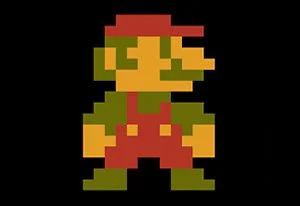

In [4]:
imagen

In [6]:
imagen_array.shape

(206, 300, 3)

In [145]:
# Kernel de desenfoque (3x3)
kernel = np.array([
    [[1/9, 1/9, 1/9], [1/9, 1/9, 1/9], [1/9, 1/9, 1/9]],  # Canal Rojo
    [[1/9, 1/9, 1/9], [1/9, 1/9, 1/9], [1/9, 1/9, 1/9]],  # Canal Verde
    [[1/9, 1/9, 1/9], [1/9, 1/9, 1/9], [1/9, 1/9, 1/9]]   # Canal Azul
]).transpose(1, 2, 0)  # Ajustar forma para (3x3x3)

In [146]:
def img_conv(img, kernel):
    # Aplicar la convolución en cada canal por separado
    resultados = []
    for canal in range(3):  # Iterar sobre los canales (RGB)
        convolucion = scipy.signal.convolve2d(imagen_array[:, :, canal], kernel[:, :, canal], mode='same', boundary='symm')
        # Normalizar los valores entre 0 y 255
        convolucion_normalizada = np.clip(convolucion, 0, 255).astype(np.uint8)
        resultados.append(convolucion_normalizada)
    
    # Reconstruir la imagen con los tres canales convolucionados
    imagen_convolucionada = np.stack(resultados, axis=2)
    
    # Convertir el resultado a una imagen y mostrarla
    imagen_resultado = Image.fromarray(imagen_convolucionada)
    
    # Mostrar la imagen original y la imagen resultante
    display.display(imagen, imagen_resultado)

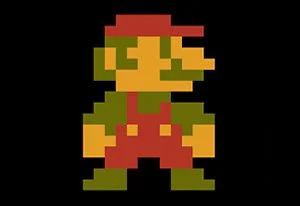

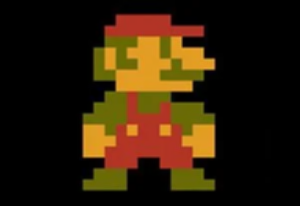

In [147]:
img_conv(imagen, kernel)

In [149]:
# Información adicional
print("Kernel utilizado:\n", kernel)
print("Tamaño de la imagen original:", imagen_array.shape)
print("Tamaño de la imagen convolucionada:", imagen_convolucionada.shape)

Kernel utilizado:
 [[[0.11111111 0.11111111 0.11111111]
  [0.11111111 0.11111111 0.11111111]
  [0.11111111 0.11111111 0.11111111]]

 [[0.11111111 0.11111111 0.11111111]
  [0.11111111 0.11111111 0.11111111]
  [0.11111111 0.11111111 0.11111111]]

 [[0.11111111 0.11111111 0.11111111]
  [0.11111111 0.11111111 0.11111111]
  [0.11111111 0.11111111 0.11111111]]]
Tamaño de la imagen original: (206, 300, 3)
Tamaño de la imagen convolucionada: (206, 300, 3)


<h2 style="color: #007ACC;"> Kernel gaussiano </h2>

Un kernel gaussiano es una matriz utilizada para suavizar imágenes aplicando una distribución gaussiana (o normal) para dar más peso a los píxeles cercanos al centro. A continuación, te muestro cómo puedes simular un kernel gaussiano en Python:

In [150]:
def gen_gaussian_kernel(N, sigma) -> np.ndarray:
    # Crear un rango de valores centrado en 0
    rango = np.arange(-(tamano // 2), N // 2 + 1)
    x, y = np.meshgrid(rango, rango)

    # Calcular el kernel gaussiano
    kernel = np.exp(-(x**2 + y**2) / (2 * sigma**2))

    # Normalizar el kernel para que la suma sea 1
    kernel /= np.sum(kernel)

    return kernel

In [166]:
# Ejemplo de uso
tamano = 5# Tamaño del kernel (5x5)
sigma = 1.0  # Desviación estándar
kernel_gaussiano = gen_gaussian_kernel(tamano, sigma)

In [167]:
kernel_rgb = np.stack([kernel_gaussiano, kernel_gaussiano, kernel_gaussiano], axis=-1)

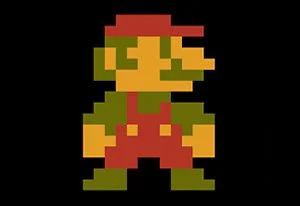

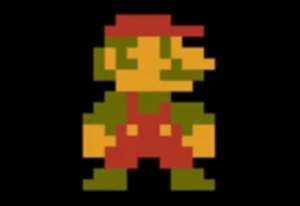

In [168]:
img_conv(imagen, kernel_rgb)

<h2 style="color: #007ACC;"> Kernel laplaciano </h2>

Un kernel laplaciano es un filtro comúnmente usado en procesamiento de imágenes para resaltar bordes. Se basa en la segunda derivada, detectando cambios rápidos en intensidad.

In [176]:
kernel = np.array([
    [ 0, -1,  0],
    [-1,  4, -1],
    [ 0, -1,  0]
])

kernel_rgb = np.stack([kernel, kernel, kernel], axis=-1)

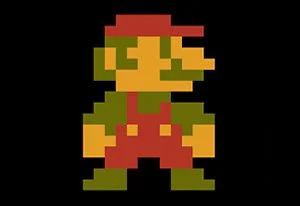

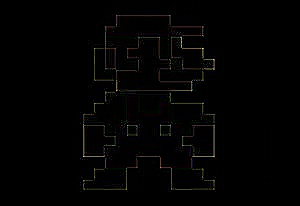

In [177]:
img_conv(imagen, kernel_rgb)

<h2 style="color: #007ACC;"> Pagging </h2>

El padding se refiere a agregar bordes adicionales alrededor de la imagen de entrada. Esto se hace principalmente por dos razones:

1. Preservar el tamaño original de la imagen: Sin padding, la salida de una convolución tiene un tamaño reducido porque el filtro no puede procesar los bordes completamente.
2. Resaltar características en los bordes: Agregar padding asegura que las características en los bordes también se procesen adecuadamente.

Tipos de Padding:
- Sin padding (válido): No se agrega relleno. La salida será más pequeña que la entrada.
- Padding con ceros (cero-padding): Se añaden ceros alrededor de la imagen.
- Padding simétrico o reflejo: Los valores alrededor de la imagen son reflejos de los bordes originales.

In [179]:
from IPython.display import Image

Image(url='../img/1_awHl8cYgPSP4Aj8t929T5g.gif')  

<h2 style="color: #007ACC;"> Stride </h2>

El stride es el número de pasos que el filtro (o kernel) se mueve a través de la imagen. Un stride más grande significa que el filtro "salta" más píxeles entre cálculos, lo que reduce el tamaño de la salida.

Efectos del Stride:
- Stride pequeño (e.g., 1): El filtro se mueve de píxel en píxel. La salida es más detallada y de mayor tamaño.
- Stride grande (e.g., 2 o más): El filtro salta píxeles, disminuyendo el tamaño de la salida, lo que se conoce como "submuestreo".

In [180]:
from IPython.display import Image

Image(url='../img/stride.gif')  

<h2 style="color: #007ACC;"> Pooling </h2>

El **pooling** es una operación clave en el procesamiento de imágenes. Su propósito principal es reducir las dimensiones espaciales (alto y ancho) de una imagen o de los mapas de características generados por las capas convolucionales, manteniendo la información más relevante. Esto se logra al aplicar una operación que resume o combina los valores de un grupo de píxeles vecinos. Esto tiene los siguientes usos:

1. **Reducción de dimensiones:** Disminuye el tamaño de las representaciones intermedias, lo que reduce la carga computacional y los requisitos de memoria.
2. **Extracción de características dominantes:** Permite enfocarse en las características más importantes de la imagen, como bordes o texturas principales.
3. **Robustez ante traslaciones:** Hace que la red sea menos sensible a pequeños desplazamientos o deformaciones en la entrada, mejorando su capacidad de generalización.

<h3 style="color: #007ACC;"> Max pooling </h3>

El **max pooling** es una técnica fundamental debido a su capacidad para destacar las características más relevantes de una imagen al reducir las dimensiones de los mapas de características sin perder información crítica. Seleccionando el valor máximo dentro de cada región del kernel, el max pooling ayuda a preservar los bordes y patrones dominantes, que son esenciales para tareas de clasificación y detección. Además, su simplicidad y eficiencia lo hacen ideal para reducir la complejidad computacional, mejorar la robustez de la red ante traslaciones y evitar el sobreajuste al resumir los datos en representaciones más compactas. Esta técnica, al centrarse en los valores máximos, asegura que las características más importantes no se diluyan durante el procesamiento, siendo clave para el éxito de modelos en visión por computadora.

<img src='../img/max_pooling.jpg'>

<h3 style="color: #007ACC;"> Average pooling </h3>

El **average pooling** es una técnica esencial en escenarios donde se busca una representación más generalizada y suave de los datos. Al calcular el promedio de los valores en cada región del kernel, el average pooling reduce las dimensiones espaciales de los mapas de características mientras conserva una visión global de las mismas. Esto lo hace útil para preservar patrones contextuales y evitar que valores extremos dominen la representación. Además, es especialmente relevante en tareas donde se requiere una interpretación más equilibrada de las características, como en la segmentación de imágenes o modelos que priorizan la estabilidad sobre la detección de detalles específicos. Su simplicidad y efectividad lo convierten en una herramienta importante para crear modelos más robustos y menos propensos al ruido.

<img src='../img/average_pooling.png'>

<h2 style="color: #007ACC;"> Referencias </h2>

- Sección de visión artificial del Diplomado IA y AP - Avanzado de la Universidad Nacional y la empresa Aprendizaje Profundo, dictado por los expertos Álvaro Montenegro Díaz y Daniel Montenegro Reyes. Repositorio disponible en: https://github.com/AprendizajeProfundo/Diplomado
- Video "What is a convolution?" de 3Blue1Brown: https://www.youtube.com/watch?v=KuXjwB4LzSA&t=892s